# Data Loading and observation

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
import csv

In [95]:
train_news = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//train.tsv',sep='\t')
test_news = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//test.tsv',sep='\t')
valid_news = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//valid.tsv',sep='\t')

In [96]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
train_news.columns = columns
test_news.columns = columns
valid_news.columns = columns
train_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [97]:
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
import seaborn as sb

In [98]:
#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))
    
data_obs()

training dataset size:
(10239, 14)
           id        label                                          statement  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   
5   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
6    153.json    half-true  I'm the only person on this stage who has work...   
7   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
8   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   
9   7115.json  mostly-true  For the first time in history, the share of th...   

                                    subjects                 speaker  \
0

In [99]:
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

# train_news = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\train.csv')
# test_news = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\test.csv')
# valid_news = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\valid.csv')

train_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [100]:
train_news=train_news[['label','statement']]
train_news.head(2)

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."


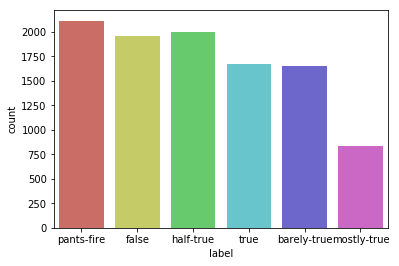

In [101]:
#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sb.countplot(x='label', data=dataFile, palette='hls')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)


In [102]:
train_news.label.unique()

array(['half-true', 'mostly-true', 'false', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [103]:
train_news['label']=np.where(train_news['label']=='half-true','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='mostly-true','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='barely-true','false',train_news['label'])
train_news['label']=np.where(train_news['label']=='pants-fire','false',train_news['label'])
train_news['label']=np.where(train_news['label']=='TRUE','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='FALSE','false',train_news['label'])

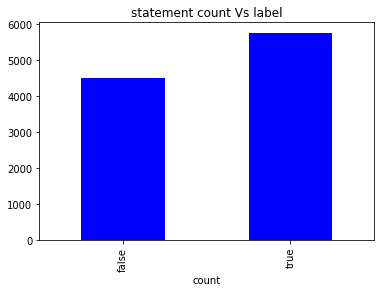

In [104]:
plt.title('statement count Vs label')
train_news.groupby(['label']).size().plot(kind='bar', color='blue')
plt.xlabel('count')
plt.show()

In [105]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()

data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 2 columns):
label        10239 non-null object
statement    10239 non-null object
dtypes: object(2)
memory usage: 160.1+ KB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 14 columns):
id                      1266 non-null object
label                   1266 non-null object
statement               1266 non-null object
subjects                1266 non-null object
speaker                 1266 non-null object
speaker_job             941 non-null object
state                   1004 non-null object
party                   1266 non-null object
barely_true_counts      1266 non-null int64
false_counts            1266 non-null int64
half_true_counts        1266 non-null int64
mostly_true_counts      1266 non-null int64
pants_on_fire_counts    1266 non-null int64
context                 1249 non-null object
dtype

In [146]:
eng_stemmer = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed


In [147]:
#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed
process_data("Says Hillary Clinton had an undercover nurse with her at the Sept. 11 memorial ceremony in New York.",exclude_stopword=True,stem=True)

[' ',
 'h',
 'l',
 'l',
 'r',
 ' ',
 'c',
 'l',
 'n',
 'n',
 ' ',
 'h',
 ' ',
 'n',
 ' ',
 'u',
 'n',
 'e',
 'r',
 'c',
 'v',
 'e',
 'r',
 ' ',
 'n',
 'u',
 'r',
 'e',
 ' ',
 'w',
 'h',
 ' ',
 'h',
 'e',
 'r',
 ' ',
 ' ',
 'h',
 'e',
 ' ',
 'e',
 'p',
 '.',
 ' ',
 '1',
 '1',
 ' ',
 'e',
 'r',
 'l',
 ' ',
 'c',
 'e',
 'r',
 'e',
 'n',
 ' ',
 'n',
 ' ',
 'n',
 'e',
 'w',
 ' ',
 'r',
 'k',
 '.']

In [136]:
train_news.groupby('label').describe()

length                                                         
        count        mean        std   min   25%    50%    75%     max
label                                                                 
false  4487.0  104.200357  54.330573  11.0  71.0   96.0  130.0  2099.0
true   5752.0  109.043637  63.866332  11.0  75.0  101.0  135.0  3192.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA2CB70>,
      dtype=object)

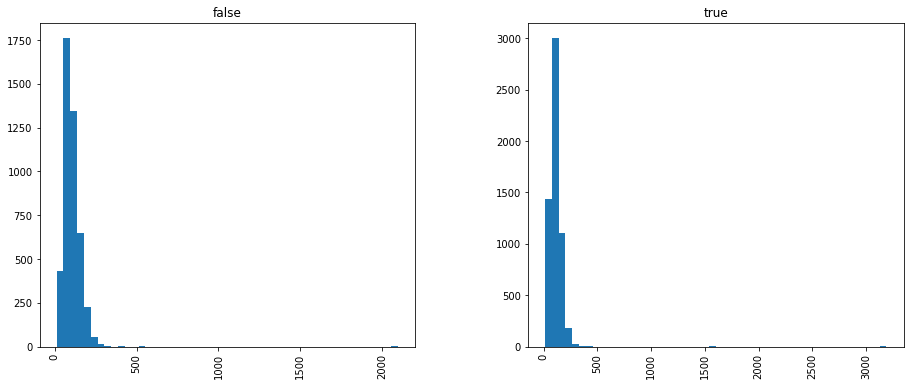

In [137]:
train_news['length'] = train_news['statement'].apply(len)
train_news.hist(column='length',by='label',bins=50, figsize=(15,6))

In [108]:
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

# trigrams
# def create_trigrams(words):
#     assert type(words) == list
#     skip == 0
#     join_str = " "
#     Len = len(words)
#     if L > 2:
#         lst = []
#         for i in range(1,skip+2):
#             for k1 in range(1, skip+2):
#                 for k2 in range(1,skip+2):
#                     for i+k1 < Len and i+k1+k2 < Len:
#                         lst.append(join_str.join([words[i], words[i+k1],words[i+k1+k2])])
#         else:
#             #set is as bigram
#             lst = create_bigram(words)
#     return list


In [152]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tokenizer('Says Hillary Clinton had an undercover nurse with her at the Sept. 11 memorial ceremony in New York.')
tokenizer_porter('Says Hillary Clinton had an undercover nurse with her at the Sept. 11 memorial ceremony in New York.')

['say',
 'hillari',
 'clinton',
 'had',
 'an',
 'undercov',
 'nurs',
 'with',
 'her',
 'at',
 'the',
 'sept.',
 '11',
 'memori',
 'ceremoni',
 'in',
 'new',
 'york.']

In [167]:
df = train_news['statement'][:20].apply(tokenizer)
df

0     [When, did, the, decline, of, coal, start?, It...
1     [Hillary, Clinton, agrees, with, John, McCain,...
2     [Health, care, reform, legislation, is, likely...
3     [The, economic, turnaround, started, at, the, ...
4     [The, Chicago, Bears, have, had, more, startin...
5     [Jim, Dunnam, has, not, lived, in, the, distri...
6     [I'm, the, only, person, on, this, stage, who,...
7     [However,, it, took, $19.5, million, in, Orego...
8     [Says, GOP, primary, opponents, Glenn, Grothma...
9     [For, the, first, time, in, history,, the, sha...
10    [Since, 2000,, nearly, 12, million, Americans,...
11    [When, Mitt, Romney, was, governor, of, Massac...
12    [The, economy, bled, $24, billion, due, to, th...
13    [Most, of, the, (Affordable, Care, Act), has, ...
14    [In, this, last, election, in, November,, ...,...
15    [McCain, opposed, a, requirement, that, the, g...
16    [U.S., Rep., Ron, Kind,, D-Wis.,, and, his, fe...
17    [Water, rates, in, Manila,, Philippines,, 

In [125]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['statement'].values)

print(countV)
print(train_count)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 751)	1
  (0, 1963)	1
  (0, 4909)	1
  (0, 8553)	1
  (0, 5686)	1
  (0, 1531)	1
  (0, 11109)	1
  (0, 10979)	1
  (0, 7673)	1
  (0, 11137)	1
  (0, 4859)	1
  (0, 7417)	1
  (0, 10425)	2
  (0, 6051)	1
  (0, 10424)	1
  (0, 2474)	1
  (0, 7671)	1
  (0, 3184)	1
  (0, 10987)	1
  (0, 3433)	1
  (0, 11933)	2
  (1, 5998)	1
  (1, 7727)	1
  (1, 3683)	1
  (1, 1568)	1
  :	:
  (10238, 6852)	1
  (10238, 10593)	1
  (10238, 3988)	1
  (10238, 10917)	1
  (10238, 8995)	1
  (10238, 10659)	1
  (10238, 2548)	1
  (10238, 11621)	1
  (10238, 2567)	1
  (10238, 799)	1
  (10238, 11659)	2
  (10238, 12157)	1
  (10238, 3308)	1
  (10238, 11003)	1
  (10

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(analyzer=tokenizer)
data = tfidfv.fit_transform(train_news['statement'])
news = train_news.iloc[5]['statement']
print(news)

Jim Dunnam has not lived in the district he represents for years now.


In [158]:
print(tfidfv.transform([news]))

  (0, 21619)	0.21861887690425189
  (0, 20173)	0.07830449136198298
  (0, 18228)	0.3827515280698789
  (0, 16081)	0.33481986504493927
  (0, 16059)	0.18705570793432064
  (0, 15091)	0.3878359435925809
  (0, 14146)	0.0969532596545632
  (0, 13683)	0.1968511789514831
  (0, 13657)	0.15131955622143353
  (0, 12982)	0.1326113063718593
  (0, 11664)	0.31236268442426673
  (0, 5133)	0.3222965517107062
  (0, 4033)	0.46041867931447567


In [159]:
j = tfidfv.transform([news]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names()[i],sep='\t')

index	idf	tfidf	term
4033	9.5409	0.4604	Dunnam
5133	6.6787	0.3223	Jim
11664	6.4729	0.3124	district
12982	2.7480	0.1326	for
13657	3.1357	0.1513	has
13683	4.0792	0.1969	he
14146	2.0091	0.0970	in
15091	8.0368	0.3878	lived
16059	3.8762	0.1871	not
16081	6.9382	0.3348	now.
18228	7.9315	0.3828	represents
20173	1.6226	0.0783	the
21619	4.5303	0.2186	years


In [126]:
# sensation_dictionary=['believe', 'suppoprt', 'ISIS', 'absolutely', 'promise','society','FBI','declare','war','recession',
#                       'prise','stock market','lottery','terror','sanction','ban','signed','climate change','global warming',
#                       'killed','shooting','gun fire','nuclear','strik','bitcoin','trump','donald','obama']
                      
# sensation_dictionary=[w.lower() for w in sensation_dictionary]

In [127]:
# stop_words=set(stopwords.words('english'))

In [ ]:
X = []
for statement in train_news:
    vectors = []
    for word in statement:
        if word in overall_model:
            vector = overall_model[word]
            vectors.append(vector)
    word_vector = []

    for i in range(0,len(vectors[0])):
        val = 0.0
        for j in range(0,len(vectors)):
            val += vectors[j][i]
        word_vector.append(val)
    X.append(word_vector)